# *Seattle Collision Data Prediction*

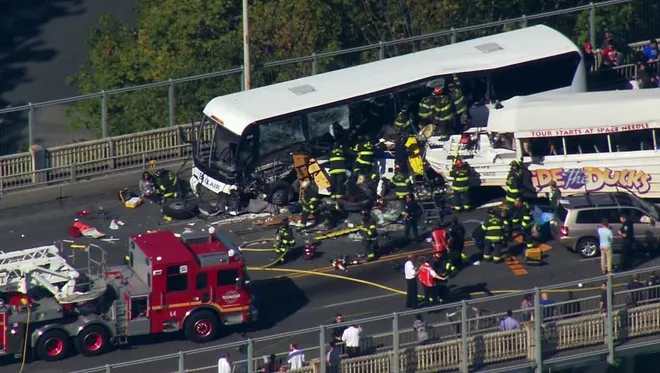

#### Importing the libraries which will be used in this notebook

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 194673)
pd.set_option('display.max_columns', 37)


## **Business Undertanding**

####  Seattle, a city on Puget Sound in the Pacific Northwest.  Washington State’s largest city, it’s home to a large tech industry, with Microsoft and Amazon headquartered in its metropolitan area. The city is of high socio-economic value and a fast moving city .The city is  in a surge to improve the lifestyle of the people living over there .one of the  most important problem they are facing is traffic .The provided dataset consist of a large amount of  collision data recorded over many years in the seattle city .This dataset also provides various information which are some kind of related to the cause of the collision 

#### below the seattle collision dataset is loaded using pandas

### **Data**

In [2]:
df = pd.read_csv('../input/seattle-sdot-collisions-data/Collisions.csv')

In [3]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

#### Just for my convenience ,  i have changed the column names

In [4]:
df.rename(columns={'SEVERITYCODE': 'severity_code', 'X':'longitude', 'Y': 'latitude',
                   'ADDRTYPE':'addr_type', 'LOCATION': 'location','SEVERITYDESC':'severity_desc', 'COLLISIONTYPE':'collision_type',
                   'PERSONCOUNT':'person_count', 'PEDCOUNT': 'ped_count', 'PEDCYLCOUNT': 'ped_cycle_count', 'VEHCOUNT': 'veh_count',
                   'INCDTTM': 'inc_dt', 'JUNCTIONTYPE': 'junc_type', 'SDOT_COLCODE': 'case_code', 'SDOT_COLDESC': 'case_desc',
                   'UNDERINFL':'under_infl', 'WEATHER': 'weather', 'ROADCOND': 'roadcond', 'LIGHTCOND': 'light_cond',
                   'ST_COLCODE': 'st_code', 'ST_COLDESC': 'st_desc', 'HITPARKEDCAR':'hit_parked_car', 'SPEEDING':'speeding', 
                   'FATALITIES':'fatalities', 'INJURIES':'injuries', 'SERIOUSINJURIES':'serious_injuries'}, inplace=True)

In [5]:
df.shape

(221266, 40)

#### It's really huge, A dataset consisting of 40 columns and 221266 rows 

#### lets take a look at the dataset

In [6]:
df.head()

,longitude,latitude,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,addr_type,INTKEY,location,EXCEPTRSNCODE,EXCEPTRSNDESC,severity_code,severity_desc,collision_type,person_count,ped_count,ped_cycle_count,...,INCDATE,inc_dt,junc_type,case_code,case_desc,INATTENTIONIND,under_infl,weather,roadcond,light_cond,PEDROWNOTGRNT,SDOTCOLNUM,speeding,st_code,st_desc,SEGLANEKEY,CROSSWALKKEY,hit_parked_car
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,...,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,...,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,...,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,...,2004/06/08 00:00:00+00,6/8/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,...,2004/10/15 00:00:00+00,10/15/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   longitude         213797 non-null  float64
 1   latitude          213797 non-null  float64
 2   OBJECTID          221266 non-null  int64  
 3   INCKEY            221266 non-null  int64  
 4   COLDETKEY         221266 non-null  int64  
 5   REPORTNO          221266 non-null  object 
 6   STATUS            221266 non-null  object 
 7   addr_type         217554 non-null  object 
 8   INTKEY            71823 non-null   float64
 9   location          216680 non-null  object 
 10  EXCEPTRSNCODE     100863 non-null  object 
 11  EXCEPTRSNDESC     11775 non-null   object 
 12  severity_code     221265 non-null  object 
 13  severity_desc     221266 non-null  object 
 14  collision_type    194767 non-null  object 
 15  person_count      221266 non-null  int64  
 16  ped_count         22

In [8]:
map = folium.Map(location=[47.606209, -122.332069], zoom_start=10)
map_clust = MarkerCluster().add_to(map)
location = df[['latitude', 'longitude']][df['longitude'].notnull()][:5000]
loc = location.values.tolist()
for i in range(len(loc)):
  folium.Marker(loc[i]).add_to(map_clust)
map

#### The above represented is the map of seattle and the locations where collisions took place .

### **Data Understanding**

**severity_code**
#### A code that corresponds to the severity of the collision

In [9]:
df['severity_code'].value_counts().to_frame('counts')

,counts
1,137485
2,58698
0,21635
2b,3098
3,349


**severity_desc**
A detailed description of the severity of the collision

In [10]:
df['severity_desc'].value_counts().to_frame('counts')

,counts
Property Damage Only Collision,137485
Injury Collision,58698
Unknown,21636
Serious Injury Collision,3098
Fatality Collision,349


#### 1 - Property damage only collision(collison causing damages only to properties)
#### 2 - injury collision(collison which caused injuries to the pedestrians or passenger involved in the collision)
#### 0 - unknown
#### 2b - the collision caused serious injuries to pedestrians or passengers
#### 3 - the collision lead to some death

**collison_type**
#### The type of collision

In [11]:
df['collision_type'].value_counts().to_frame('counts')

,counts
Parked Car,48455
Angles,35469
Rear Ended,34624
Other,24528
Sideswipe,18855
Left Turn,14082
Pedestrian,7654
Cycles,5911
Right Turn,3008
Head On,2181


**addr_type**
#### Collision address type:
• Alley
• Block
• Intersection

In [12]:
df['addr_type'].value_counts().to_frame('counts')

,counts
Block,144857
Intersection,71823
Alley,874


#### this column is similar to the junc_type

In [13]:
df['junc_type'].value_counts().to_frame('counts')

,counts
Mid-Block (not related to intersection),101579
At Intersection (intersection related),69117
Mid-Block (but intersection related),24402
Driveway Junction,11495
At Intersection (but not related to intersection),2495
Ramp Junction,190
Unknown,21


**weather**
#### A description of the weather conditions during the time of the collision.

In [14]:
df['weather'].value_counts().to_frame('counts')

,counts
Clear,114361
Raining,34021
Overcast,28508
Unknown,15131
Snowing,919
Other,853
Fog/Smog/Smoke,577
Sleet/Hail/Freezing Rain,116
Blowing Sand/Dirt,56
Severe Crosswind,26


**roadcond**
#### The condition of the road during the collision

In [15]:
df['roadcond'].value_counts().to_frame()

,roadcond
Dry,128171
Wet,48715
Unknown,15131
Ice,1231
Snow/Slush,1014
Other,136
Standing Water,119
Sand/Mud/Dirt,77
Oil,64


**light_cond**
#### The light conditions during the collision

In [16]:
df['light_cond'].value_counts().to_frame('counts')

,counts
Daylight,119166
Dark - Street Lights On,50053
Unknown,13523
Dusk,6076
Dawn,2599
Dark - No Street Lights,1573
Dark - Street Lights Off,1236
Other,244
Dark - Unknown Lighting,20


In [17]:
df[['person_count', 'ped_count', 'ped_cycle_count', 'veh_count']].describe()

,person_count,ped_count,ped_cycle_count,veh_count
count,221266.000000,221266.000000,221266.000000,221266.000000
mean,2.226230,0.038103,0.027293,1.728544
std,1.470364,0.201745,0.164345,0.831224
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,93.000000,6.000000,2.000000,15.000000


### **Data Cleaning & Pre-Processing**

#### This dataset is obtained from an external source and usually any dataset obtained will not be in a clean format ,it will always contain some missing values and some irrelevant data which are just trash to the dataset. This dataset too consist of a lot of missing values and useless datas .so before further processing the data it is important to clean the dataset

#### STATUS, INTKEY,OBJECTID, INCKEY, COLDETKEY,	REPORTNO, EXCEPTRSNCODE,	EXCEPTRSNDESC, INCDATE, INATTENTIONIND, PEDROWNOTGRNT, SDOTCOLNUM, SEGLANEKEY, CROSSWALKKEY has a lot of missing values and they are not useful and irrelevant for this dataset. so they are too dropped

In [18]:
df = df[['longitude', 'latitude','location','severity_code',
        'severity_desc','collision_type', 'person_count', 'ped_count', 'ped_cycle_count',
       'veh_count','inc_dt','addr_type', 'junc_type', 'case_code', 'case_desc','under_infl',
       'speeding', 'weather', 'roadcond', 'light_cond','st_code', 'st_desc',
       'hit_parked_car', 'injuries', 'serious_injuries', 'fatalities']]

In [19]:
df.isnull().sum()

longitude             7469
latitude              7469
location              4586
severity_code            1
severity_desc            0
collision_type       26499
person_count             0
ped_count                0
ped_cycle_count          0
veh_count                0
inc_dt                   0
addr_type             3712
junc_type            11967
case_code                1
case_desc                1
under_infl           26479
speeding            211353
weather              26688
roadcond             26608
light_cond           26776
st_code               9413
st_desc              26499
hit_parked_car           0
injuries                 0
serious_injuries         0
fatalities               0
dtype: int64

#### The obtained dataset has a lot of missing values. lets first eliminate the unwanted parts of the dataset

In [20]:
df1 = df[['latitude', 'longitude', 'severity_code', 'weather', 'roadcond', 'light_cond', 
          'speeding', 'under_infl', 'person_count', 'ped_count', 'ped_cycle_count', 'veh_count', 
          'injuries', 'serious_injuries', 'severity_desc']]

##### The speeding column had a lot of missing values and consists of only 'y' means who are speedy ,converting Y->1 and nan->0 ,thus the speeding column's looking good

In [21]:
df1['speeding'].replace(np.nan,0,inplace=True)
df1['speeding'].replace('Y', 1, inplace=True)
df1['speeding'].value_counts().to_frame('counts')

,counts
0,211353
1,9913


##### As said before the dataset has some useless data like unknown and others which won't fall under any of the category and they are a kind of outliers which ruin the dataset .hence they are all converted to nan.Hence paving way to group them under the category of missing values

In [22]:
df1.replace(to_replace={'Unknown': np.nan, 
                        'Other':np.nan}, inplace=True)

##### dropping off all the missing data from the dataset

In [23]:
df1.dropna(inplace=True)

In [24]:
df1.isnull().sum()

latitude            0
longitude           0
severity_code       0
weather             0
roadcond            0
light_cond          0
speeding            0
under_infl          0
person_count        0
ped_count           0
ped_cycle_count     0
veh_count           0
injuries            0
serious_injuries    0
severity_desc       0
dtype: int64

##### The under the influece of alcohol has a lot of variables which are just the duplicate of themselves .hence changing them to a unique numeric data which will be good for processing the data

In [25]:
df1['under_infl'].replace(to_replace={'Y':1, 'N':0, '1':1, '0':0}, inplace=True)

In [26]:
df1['under_infl'].value_counts().to_frame('counts')

,counts
0,161777
1,9229


### **visualization**

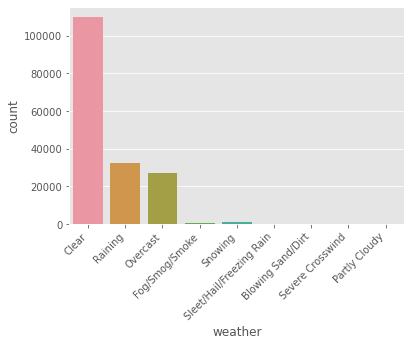

In [27]:
plt.style.use('ggplot')
ax = sns.countplot(df1['weather'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

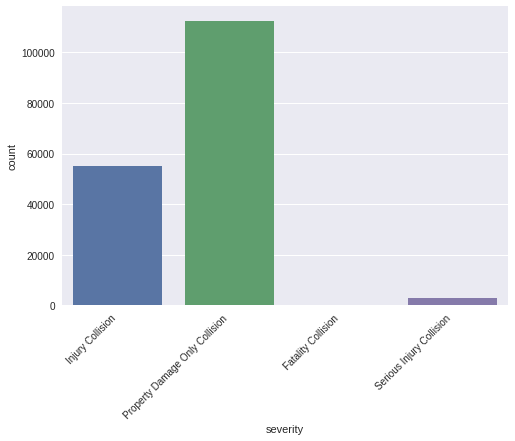

In [28]:
plt.style.use('seaborn')
ax = sns.countplot(df1['severity_desc'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('severity')
plt.show()

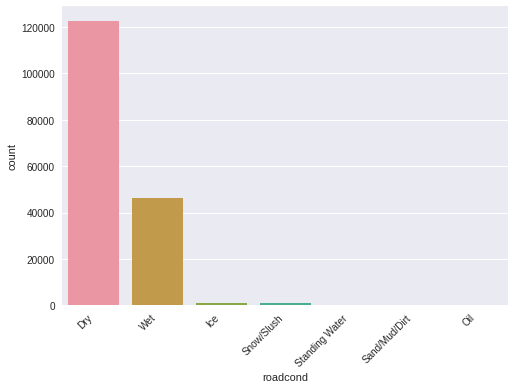

In [29]:
ax = sns.countplot(df1['roadcond'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

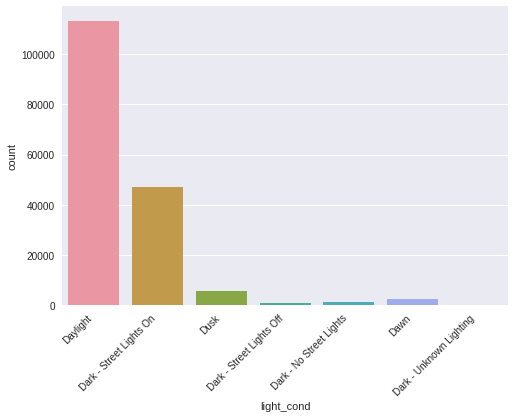

In [30]:
ax = sns.countplot(df1['light_cond'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

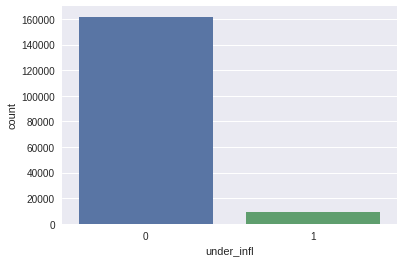

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(df1['under_infl'])

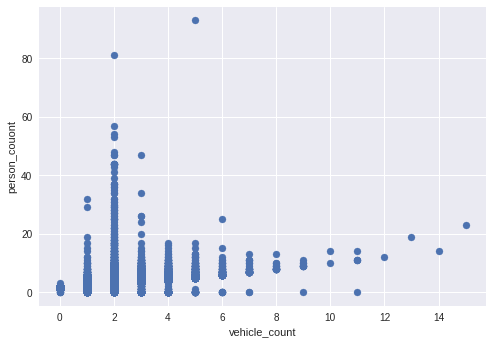

In [32]:
ax = plt.scatter(df1['veh_count'], df1['person_count'])
plt.xlabel('vehicle_count')
plt.ylabel('person_couont')
plt.show()

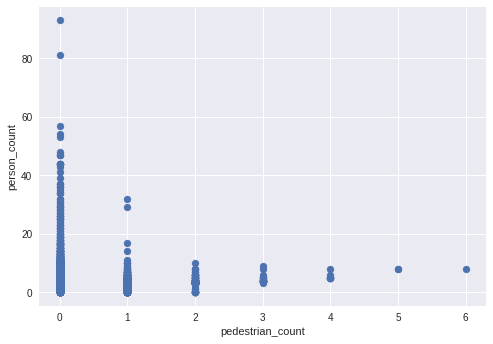

In [33]:
plt.scatter(df1['ped_count'], df1['person_count'])
plt.xlabel('pedestrian_count')
plt.ylabel('person_count')
plt.show()

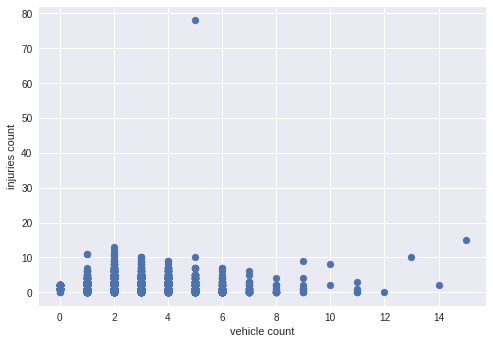

In [34]:
plt.scatter(df1['veh_count'], df1['injuries'])
plt.xlabel('vehicle count')
plt.ylabel('injuries count')
plt.show()

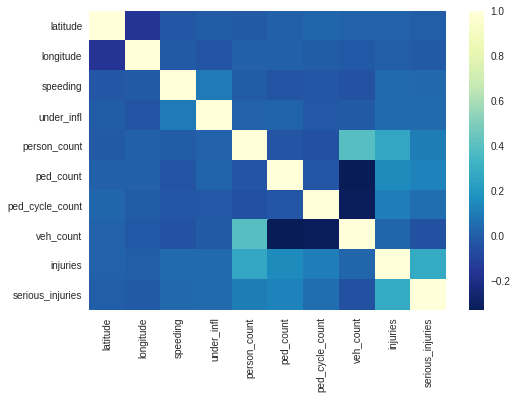

In [35]:
sns.heatmap(df1.corr(), cmap='YlGnBu_r')
plt.show()

##### using one hot encoding to change the categorical variables. Its good to use pd.get_dummies ,its another way for one hot encoding as the column names of category comes along with it and its good to see.

In [36]:
df2 = pd.concat([df1.drop(['weather', 'roadcond', 'light_cond','severity_desc'], axis=1),
                 pd.get_dummies(df1['weather']),
                 pd.get_dummies(df1['roadcond']),
                 pd.get_dummies(df1['light_cond'])], axis=1)
df2.reset_index(drop=True, inplace=True)

In [37]:
df2.head().T

,0,1,2,3,4
latitude,47.5647,47.6869,47.6687,47.683,47.7226
longitude,-122.387,-122.342,-122.375,-122.301,-122.324
severity_code,2,2,1,1,1
speeding,0,0,0,0,0
under_infl,0,0,0,0,0
person_count,2,4,4,2,2
ped_count,1,0,0,0,0
ped_cycle_count,0,0,0,0,0
veh_count,1,2,3,2,2
injuries,1,2,0,0,0


##### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. Finding the correlation among the features of the dataset helps understand the data better. For example, in the heatmap shown below, it can be observed that some features have a strong positive / negative correlation while most of them have weak / no correlation.

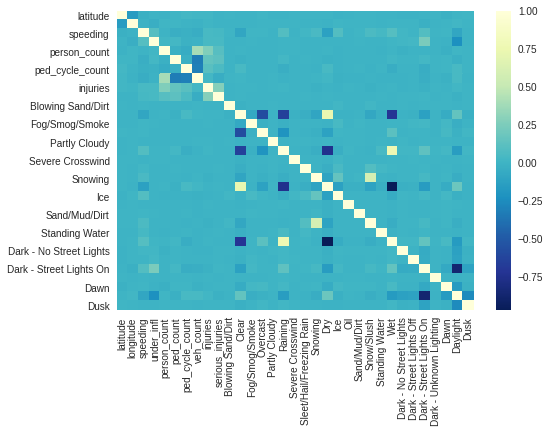

In [38]:
sns.heatmap(df2.corr(), cmap='YlGnBu_r')
plt.show()

##### The next step is to divide the dataset into data values and labels that means to x and y .Then normalizing the data for feature scaling, passing the data to the train_test_split function.here ,we split the data into training data and testing data as x_train, x_test, y_train, y_test by choosing a split ratio of 0.2 ,means 20% of data used for testing

In [39]:
x = df2.drop('severity_code', axis=1)
y = df2[['severity_code']]
X = StandardScaler().fit(x).transform(x)

In [40]:
X[:2]

array([[-0.95482573, -1.89050387, -0.23633302, -0.23884653, -0.35938055,
         4.26872587, -0.18550145, -1.64503474,  0.6890565 , -0.10613607,
        -0.01567373,  0.74580625, -0.0565439 , -0.43443112, -0.00725483,
        -0.48363059, -0.01209194, -0.02525492, -0.069626  ,  0.62730393,
        -0.07957398, -0.01692991, -0.01841968, -0.06983769, -0.02394594,
        -0.60823022, -0.08983414, -0.08071949, -0.61666173, -0.0093661 ,
        -0.12006191,  0.71390954, -0.18565826],
       [ 1.19847862, -0.38318037, -0.23633302, -0.23884653,  1.04053359,
        -0.21029716, -0.18550145,  0.05720726,  1.95761717, -0.10613607,
        -0.01567373, -1.34083081, -0.0565439 , -0.43443112, -0.00725483,
         2.06769385, -0.01209194, -0.02525492, -0.069626  , -1.59412361,
        -0.07957398, -0.01692991, -0.01841968, -0.06983769, -0.02394594,
         1.64411429, -0.08983414, -0.08071949,  1.62163461, -0.0093661 ,
        -0.12006191, -1.4007377 , -0.18565826]])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Modelling and Evaluation**

#### The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data.The output from modeling is a trained model that can be used for inference, making predictions on new data points.
#### Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our data and how well the chosen model will work in the future. To avoid overfitting, both methods use a test set (not seen by the model) to evaluate model performance

#### Decision Tree makes decision with tree-like model. It splits the sample into two or more homogenous sets (leaves) based on the most significant differentiators in the input variables. To choose a differentiator (predictor), the algorithm considers all features and does a binary split on them (for categorical data, split by category; for continuous, pick a cut-off threshold). It will then choose the one with the least cost (i.e. highest accuracy), and repeats recursively, until it successfully splits the data in all leaves (or reaches the maximum depth).

#### Information gain for a decision tree classifier can be calculated either using the Gini Index measure or the Entropy measure, whichever gives a greater gain. A hyper parameter Decision Tree Classifier was used to decide which tree to use, DTC using entropy had greater information gain; hence it was used for this classification problem.


In [42]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(x_train, y_train)
print(tree_model)
yhat1 = tree_model.predict(x_test)
print('The accuracy of the decision tree classifier is {} with a max_depth of 5'.format(accuracy_score(y_test, yhat1)))

DecisionTreeClassifier(criterion='entropy', max_depth=5)
The accuracy of the decision tree classifier is 0.9976024793871704 with a max_depth of 5


In [43]:
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22486
           2       1.00      1.00      1.00     11017
          2b       0.98      1.00      0.99       618
           3       0.00      0.00      0.00        81

    accuracy                           1.00     34202
   macro avg       0.74      0.75      0.75     34202
weighted avg       1.00      1.00      1.00     34202



#### Random Forest Classifier is an ensemble (algorithms which combines more than one algorithms of same or different kind for classifying objects) tree-based learning algorithm. RFC is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. Used for both classification and regression.

#### Similar to DTC, RFT requires an input that specifies a measure that is to be used for classification, along with that a value for the number of estimators (number of decision trees) is required. A hyper parameter RFT was used to determine the best choices for the above mentioned parameters. RFT with 75 DT’s using entropy as the measure gave the best accuracy when trained and tested on pre-processed accident severity dataset.


In [44]:
forest_model = RandomForestClassifier(n_estimators=75)
forest_model.fit(x_train, y_train)
print(forest_model)
yhat2 = forest_model.predict(x_test)
print('the accuracy score for Random Forest Classifier is {}'.format(accuracy_score(y_test, yhat2)))

RandomForestClassifier(n_estimators=75)
the accuracy score for Random Forest Classifier is 0.9974855271621542


In [45]:
print(classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22486
           2       1.00      1.00      1.00     11017
          2b       0.98      1.00      0.99       618
           3       0.22      0.02      0.04        81

    accuracy                           1.00     34202
   macro avg       0.80      0.76      0.76     34202
weighted avg       1.00      1.00      1.00     34202



#### Logistic Regression is a classifier that estimates discrete values (binary values like 0/1, yes/no, true/false) based on a given set of an independent variables. It basically predicts the probability of occurrence of an event by fitting data to a logistic function. Hence it is also known as logistic regression. The values obtained would always lie within 0 and 1 since it predicts the probability.

#### The chosen dataset has more than two target categories in terms of the accident severity code assigned, one-vs-one (OvO) strategy is employed.
****

In [46]:
log_reg_model = LogisticRegression(C=0.01)
log_reg_model.fit(x_train, y_train)
print(log_reg_model)
yhat3 = log_reg_model.predict(x_test)
print('The accuracy score for logistic regression is{}'.format(accuracy_score(y_test, yhat3)))

LogisticRegression(C=0.01)
The accuracy score for logistic regression is0.9974562891059002


In [47]:
print(classification_report(y_test, yhat3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22486
           2       1.00      1.00      1.00     11017
          2b       0.98      1.00      0.99       618
           3       0.25      0.01      0.02        81

    accuracy                           1.00     34202
   macro avg       0.81      0.75      0.75     34202
weighted avg       1.00      1.00      1.00     34202



### **Results**

#### The accuracies of all the  models is 100% which means we can accurately predict the severity of an accident. A bar plot is plotted below with the bars representing the accuracy of each model.

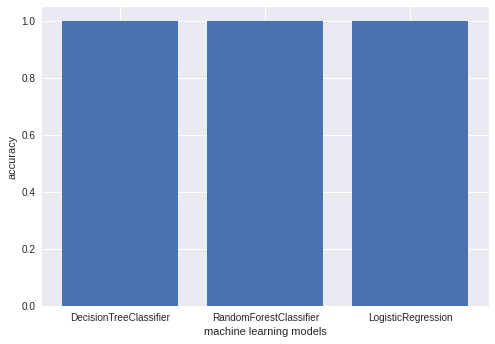

In [48]:
plt.bar(['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'], [1.,1.,1.])
plt.ylabel('accuracy')
plt.xlabel('machine learning models')
plt.show()

### **Conclusion**

#### Initially, The classifiers had an prediction accuracy of 66%-71%, however, upon going back to the data preparation and taking additional fields in the dataset improved the overall accuracy of all models.

#### The accuracy of the classifiers is excellent, i.e. 100%. This means that the model has trained well and fits the training data and performs well on the testing set as well as the training set. We can conclude that this model can accurately predict the severity of car accidents in Seattle.